In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import json
%matplotlib inline  
wtiData=pd.read_csv('data\\CHRIS-CME_CL1.csv')

brentData=pd.read_csv('data\\CHRIS-ICE_B1.csv')


wtiData.set_index(pd.to_datetime(wtiData.Date,format='%Y-%m-%d'),inplace=True)
brentData.set_index(pd.to_datetime(brentData.Date,format='%Y-%m-%d'),inplace=True)

brentData.columns=['BRENT_'+x for x in brentData.columns]
wtiData.columns=['WTI_'+x for x in wtiData.columns]

dataset=brentData.merge(wtiData,how='inner',right_index=True,left_index =True)

In [12]:
print(brentData.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6266 entries, 2017-10-13 to 1993-03-17
Data columns (total 12 columns):
BRENT_Date                       6266 non-null object
BRENT_Open                       6205 non-null float64
BRENT_High                       6205 non-null float64
BRENT_Low                        6205 non-null float64
BRENT_Settle                     6205 non-null float64
BRENT_Change                     3540 non-null float64
BRENT_Wave                       500 non-null float64
BRENT_Volume                     6213 non-null float64
BRENT_Prev. Day Open Interest    6265 non-null float64
BRENT_EFP Volume                 3391 non-null float64
BRENT_EFS Volume                 2635 non-null float64
BRENT_Block Volume               3489 non-null float64
dtypes: float64(11), object(1)
memory usage: 796.4+ KB
None


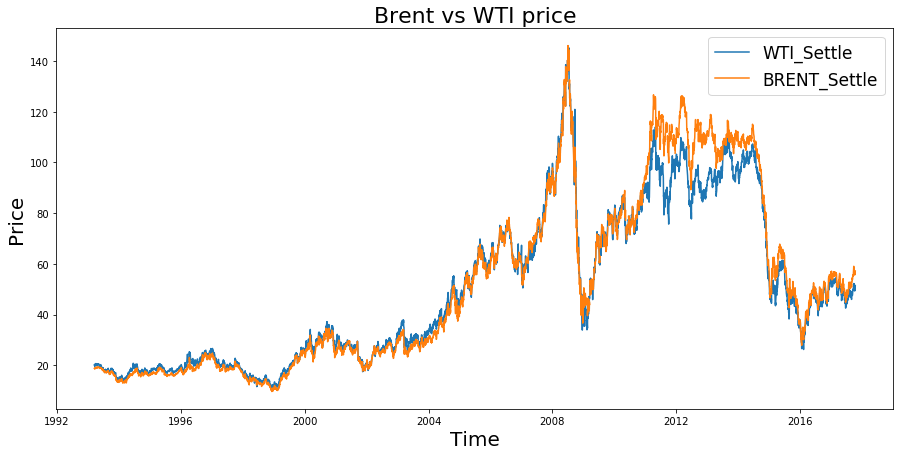

In [11]:
fig, ax = plt.subplots(figsize=(15,7))

plt.plot(dataset['WTI_Settle'])
plt.plot(dataset['BRENT_Settle'])
#Add some text for labels, title and axes ticks
ax.set_xlabel("Time",fontsize=20)
ax.set_ylabel('Price',fontsize=20)
ax.set_title('Brent vs WTI price',fontsize=22)

ax.legend(fontsize=17)
      
plt.show()



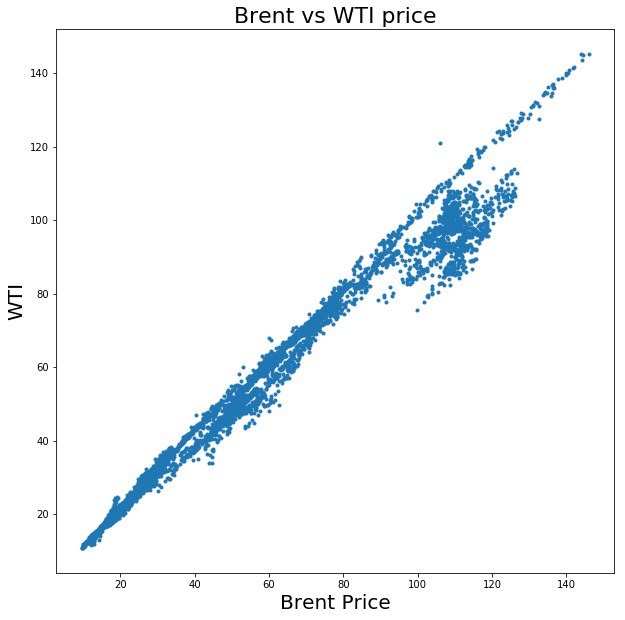

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("Brent Price",fontsize=20)
ax.set_ylabel('WTI',fontsize=20)
ax.set_title('Brent vs WTI price',fontsize=22)
plt.plot(dataset['BRENT_Settle'],dataset['WTI_Settle'],'.')

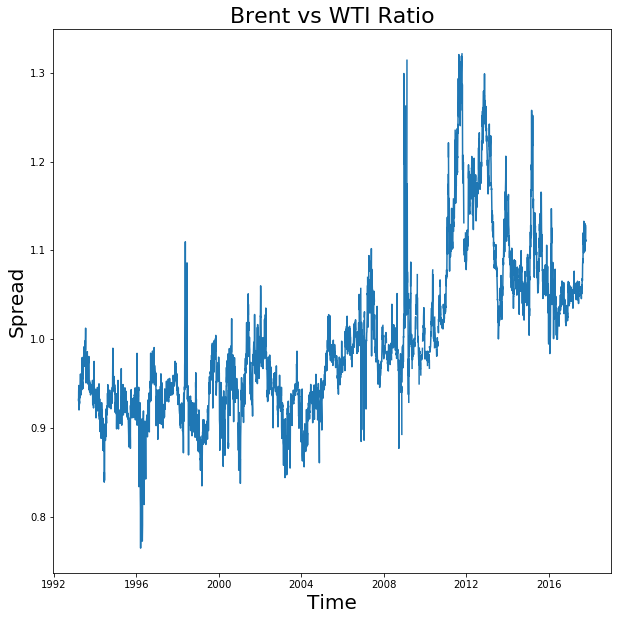

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("Time",fontsize=20)
ax.set_ylabel('Spread',fontsize=20)
ax.set_title('Brent vs WTI Ratio',fontsize=22)
plt.plot(dataset['BRENT_Settle']/dataset['WTI_Settle'])